# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from scipy.stats import skew

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to show the graphs in the notebook
%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Sets the limit for the maximum number of columns rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# import libraries for building models
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
data.shape

(4612, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
for i in data:
    print(data[i].value_counts())
    print('*' * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
**************************************************
age
57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
51     88
54     88
49     87
21     86
50     85
46     85
23     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
18     66
35     66
40     63
37     60
38     58
36     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: count, dtype: int64
**************************************************
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
first_interaction
Website       2542
Mobile App    2070
Name: c

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations

* There are no missing data in the dataset.
* We have 4612 rows of data.
* Age, website_visits, time_spent_on_website and page_views_per_visit are numerical columns.
* ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels and referral are categorical columns.
* Status is the column we want to predict.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [7]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_box2.text(
        0.5, 1.05, f"Skewness: {skew(data[feature].dropna()):.2f}",
        horizontalalignment='center', verticalalignment='bottom',
        transform=ax_box2.transAxes, fontsize=12, color='blue', fontweight='bold'
    )
    plt.show()  #Showing the Plot

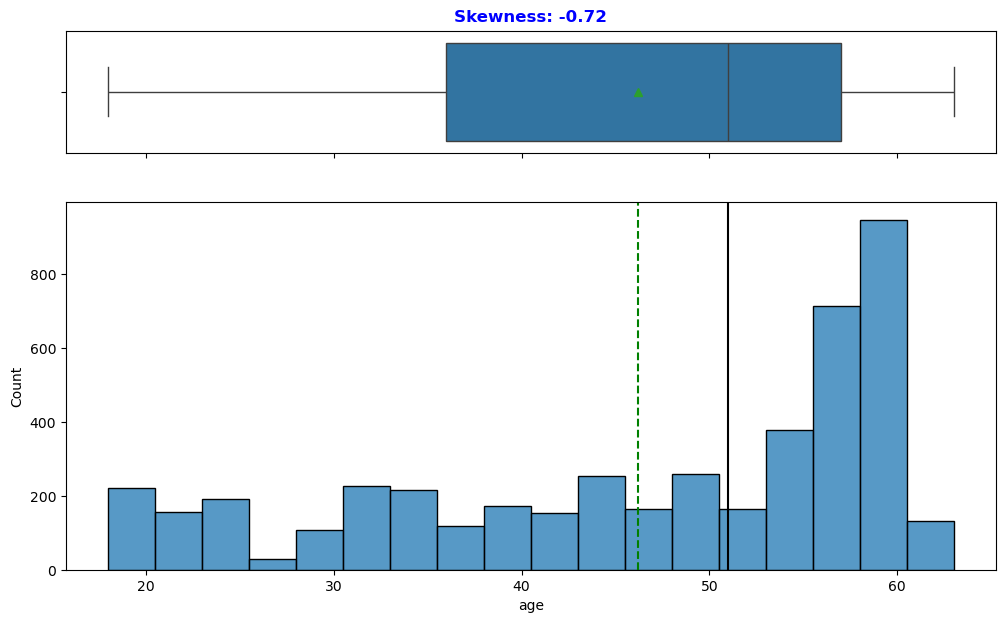

In [8]:
histogram_boxplot(data, 'age')

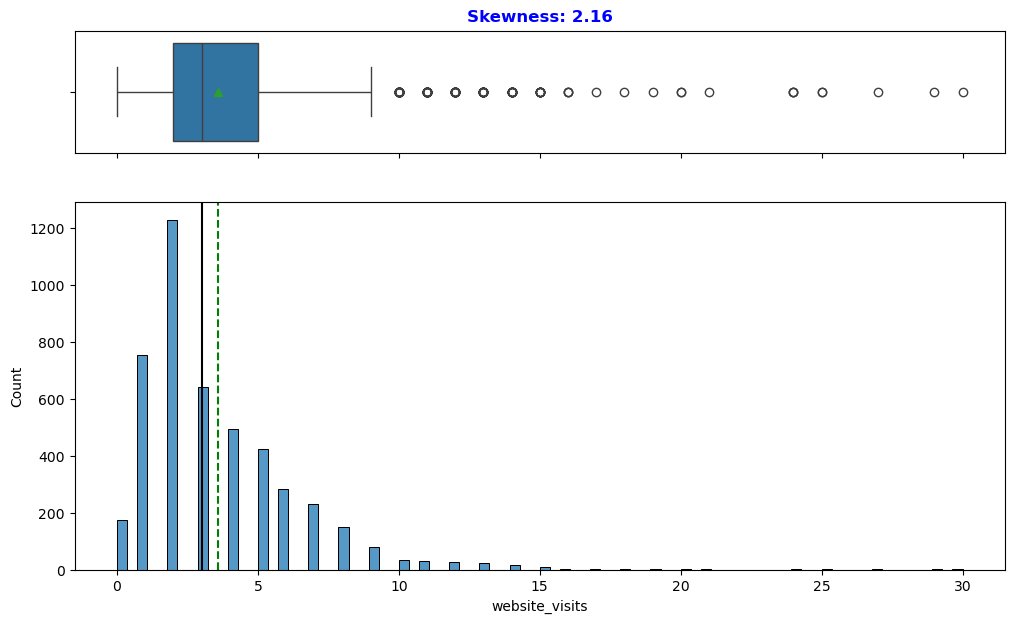

In [9]:
histogram_boxplot(data, 'website_visits')

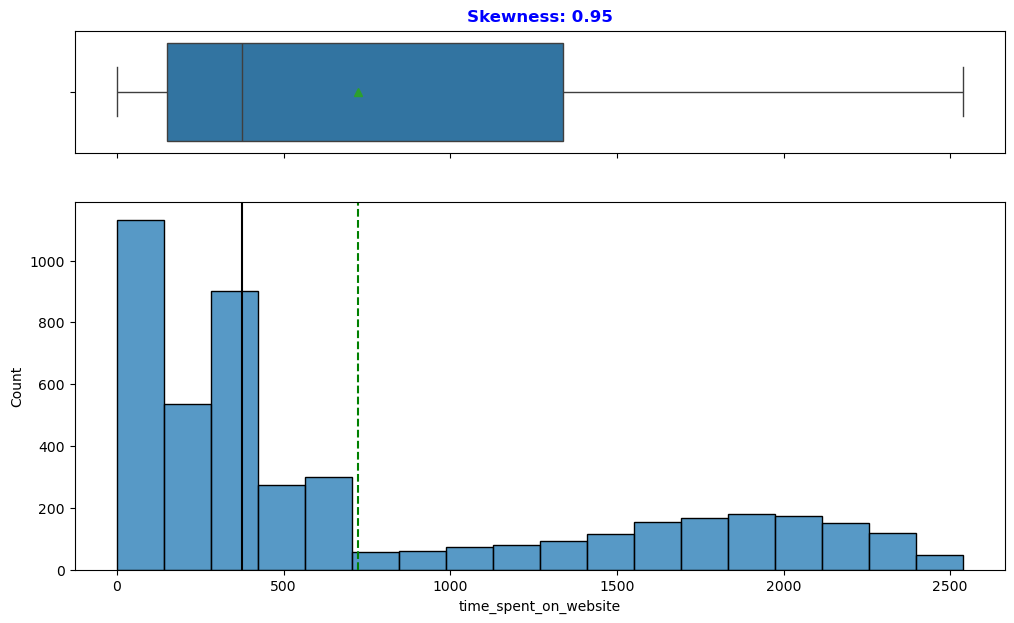

In [10]:
histogram_boxplot(data, 'time_spent_on_website')

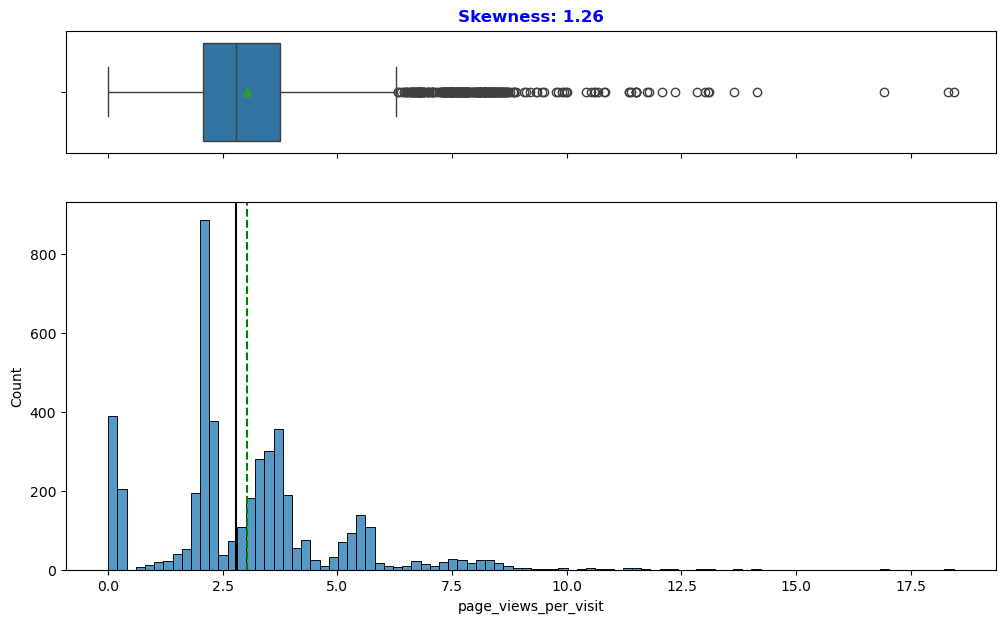

In [11]:
histogram_boxplot(data, 'page_views_per_visit')

In [12]:
def labeled_barplot(data, feature, perc=False):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5))
    
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired"
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

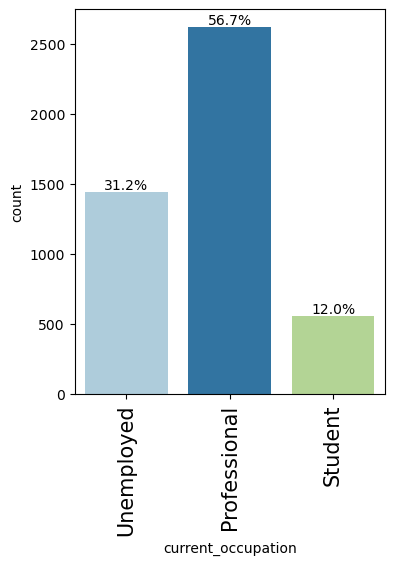

In [13]:
labeled_barplot(data, "current_occupation", perc=True)

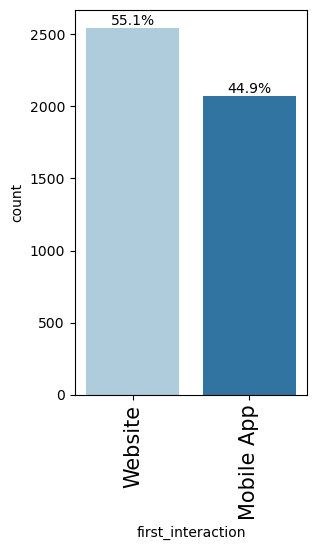

In [14]:
labeled_barplot(data, "first_interaction", perc=True)

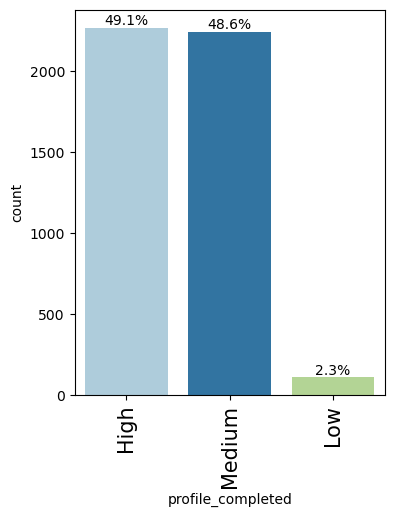

In [15]:
labeled_barplot(data, "profile_completed", perc=True)

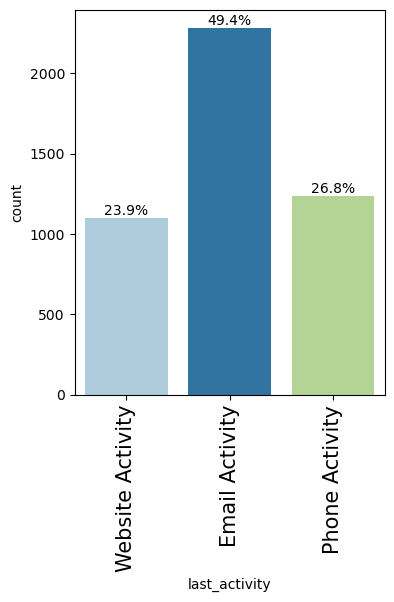

In [16]:
labeled_barplot(data, "last_activity", perc=True) 

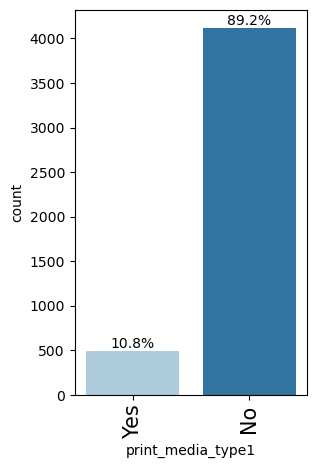

In [17]:
labeled_barplot(data, "print_media_type1", perc=True)

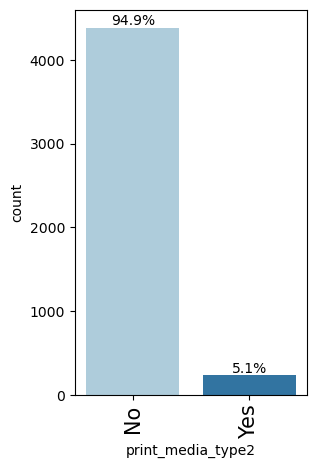

In [18]:
labeled_barplot(data, "print_media_type2", perc=True)

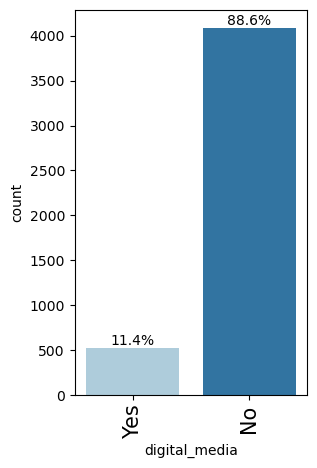

In [19]:
labeled_barplot(data, "digital_media", perc=True)

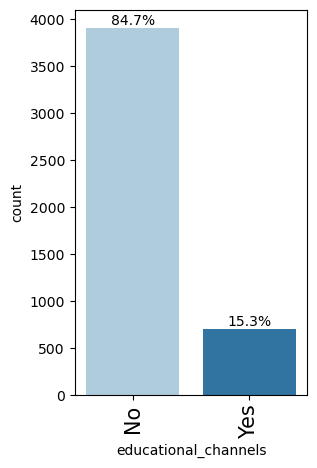

In [20]:
labeled_barplot(data, "educational_channels", perc=True)

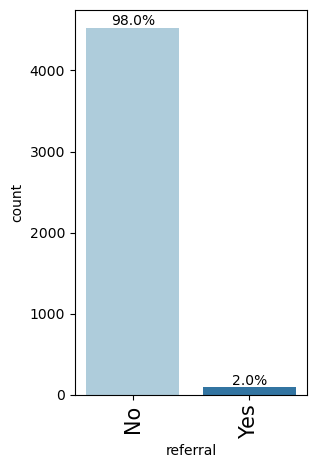

In [21]:
labeled_barplot(data, "referral", perc=True)

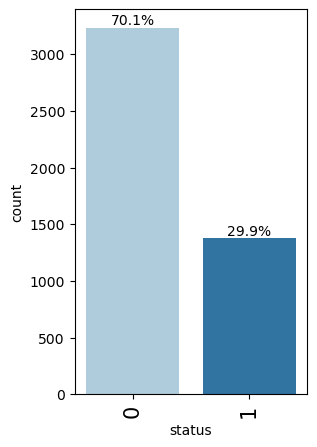

In [22]:
labeled_barplot(data, "status", perc=True)

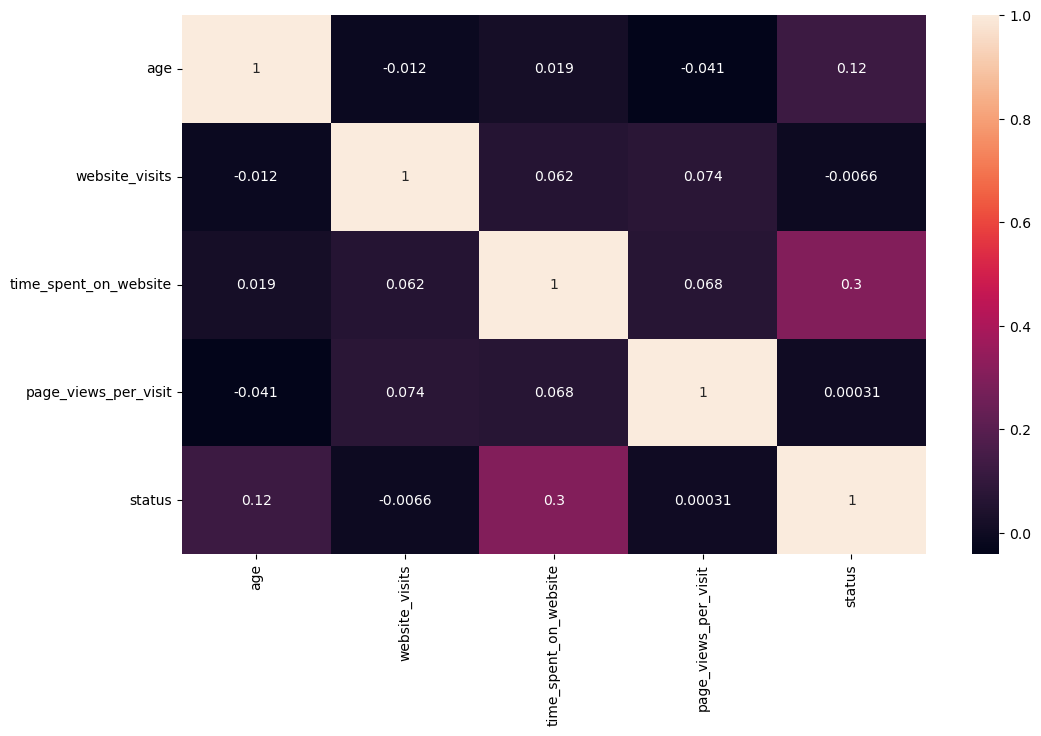

In [23]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True
)
plt.show()

In [24]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 110)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
--------------------------------------------------------------------------------------------------------------


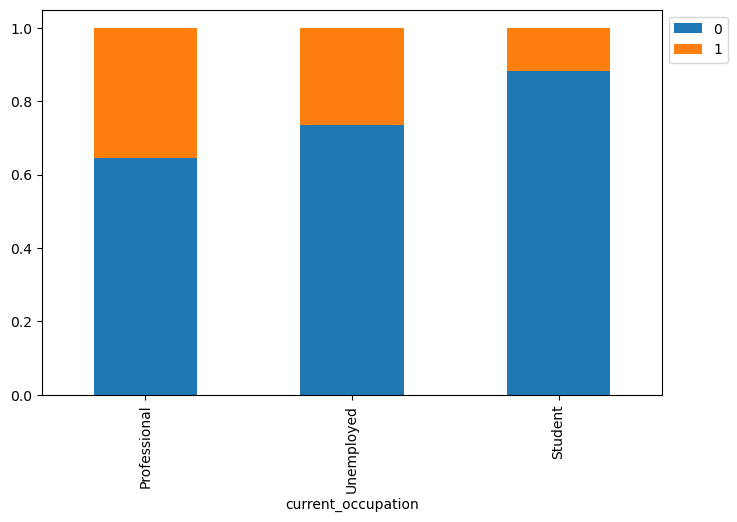

In [25]:
stacked_barplot(data, "current_occupation", "status")

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
--------------------------------------------------------------------------------------------------------------


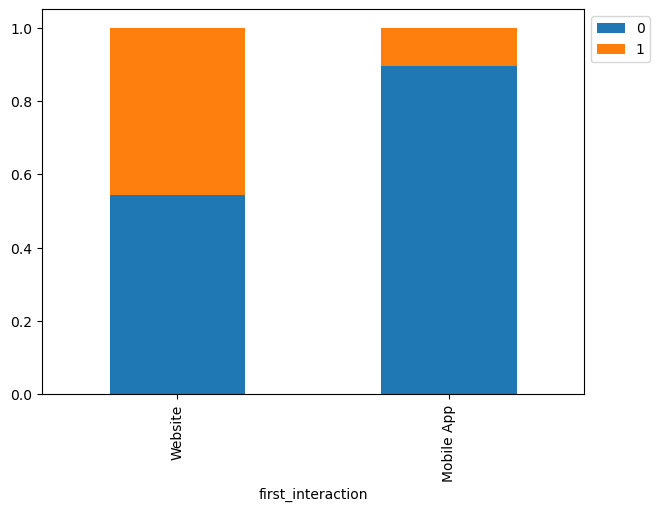

In [26]:
stacked_barplot(data, "first_interaction", "status")

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
--------------------------------------------------------------------------------------------------------------


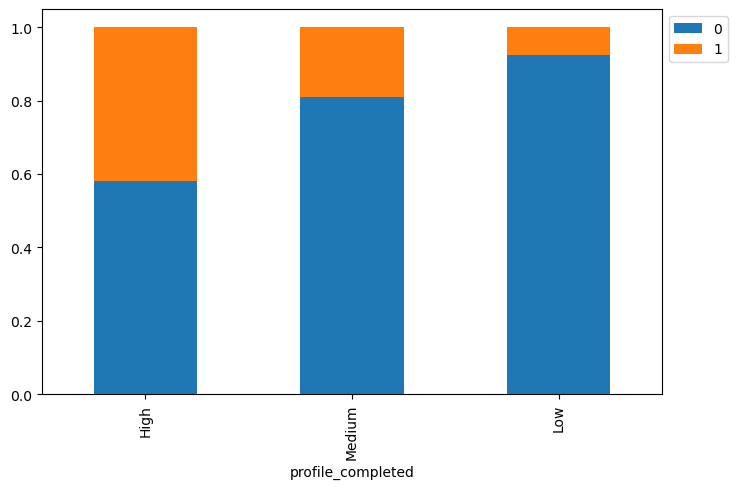

In [27]:
stacked_barplot(data, "profile_completed", "status")

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
--------------------------------------------------------------------------------------------------------------


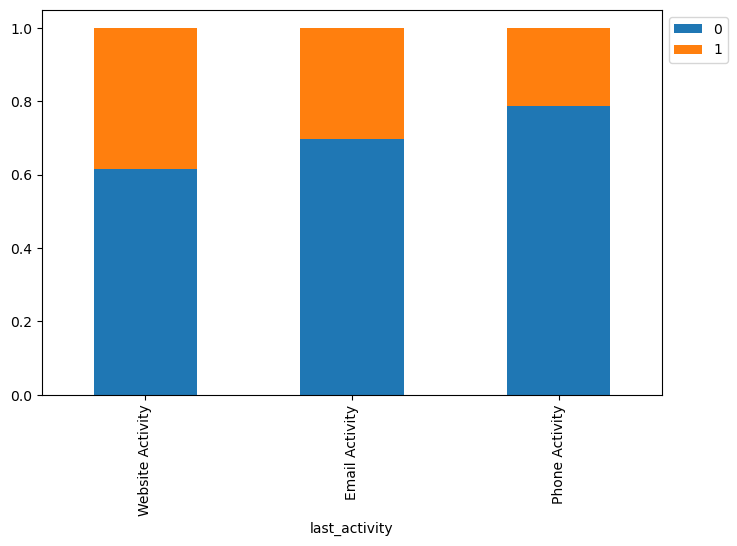

In [28]:
stacked_barplot(data, "last_activity", "status")

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
--------------------------------------------------------------------------------------------------------------


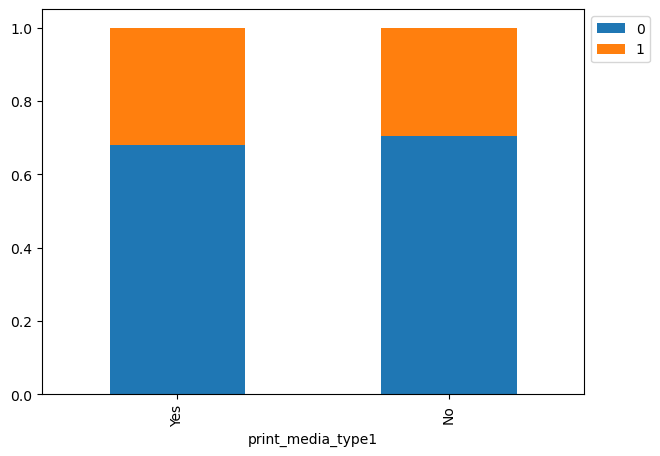

In [29]:
stacked_barplot(data, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
--------------------------------------------------------------------------------------------------------------


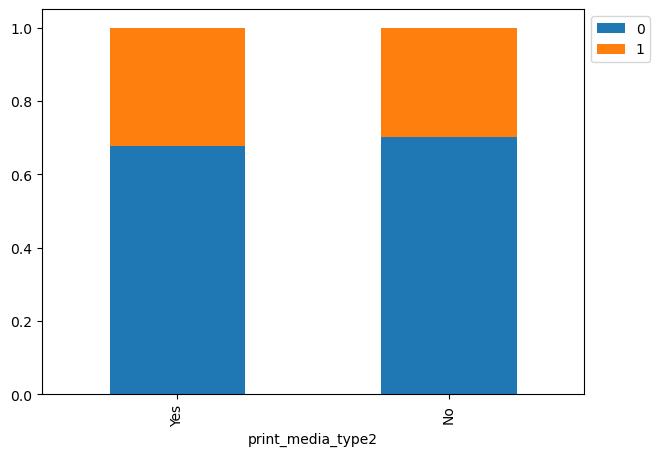

In [30]:
stacked_barplot(data, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
--------------------------------------------------------------------------------------------------------------


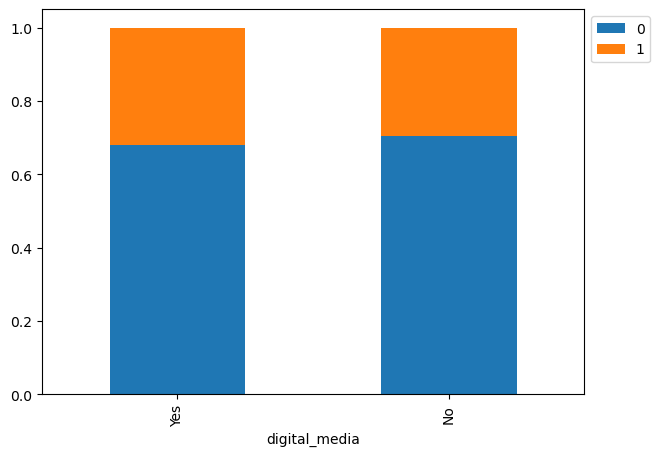

In [31]:
stacked_barplot(data, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
--------------------------------------------------------------------------------------------------------------


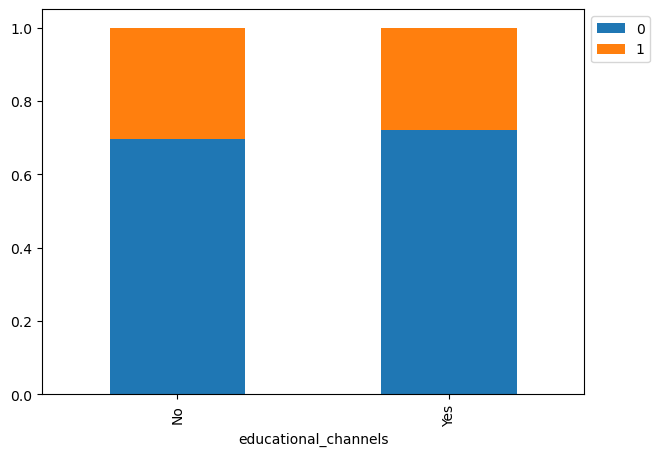

In [32]:
stacked_barplot(data, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
--------------------------------------------------------------------------------------------------------------


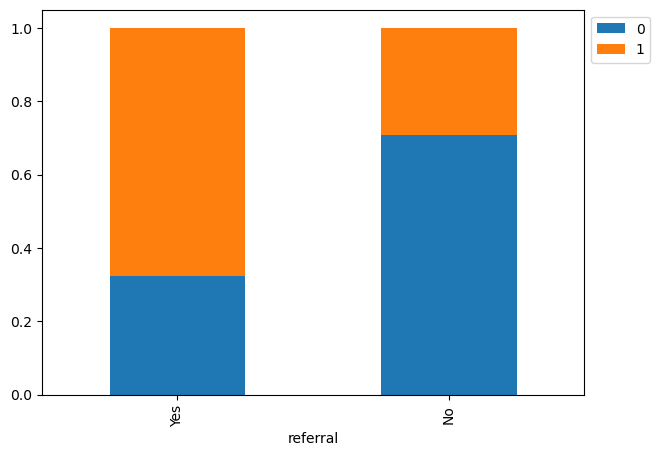

In [33]:
stacked_barplot(data, "referral", "status")

## Observations

* From the histogram of age we can see that more leads that are older than 40. It has a relatively low negative skew.
* Website visits has a high positive skew value, this tells us that the traffic on the website is pretty low.
* Time spend has a relatively low positive skew, this tells us most people don't spend long on the website.
* Page views per visit has a positive skew, this tells us that a person is likely to vsiit less than 3 pages if he visits the website.
* Most of the leads are working professionals.
* Almost all of the leads have completed at least 50% of their profile. Leads with highly completed profiles are more likely to be converted.
* From the correlation matrix we can see that there is only a slight positive correlation between status and time spent on the website. Someone who spends a lot of time on the website should be considered a lead.
* Professionals have a higher chance of becoming a paid customer and student has the least amount.
* Leads who first interacted with the website should be coinsidered better leads than the ones coming from the mobile app
* Enrolled students are more likely to give a referral.
* Email activity has the highest share in the last activity column. That means the most recent interaction was through email and can be considered the most prefered meathod.
* Most number of leads came through educational channels first, then digital media, then print media 1 and then print media 2.
* Leads that came through referrals were more likeley to be closed than those that didn't.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

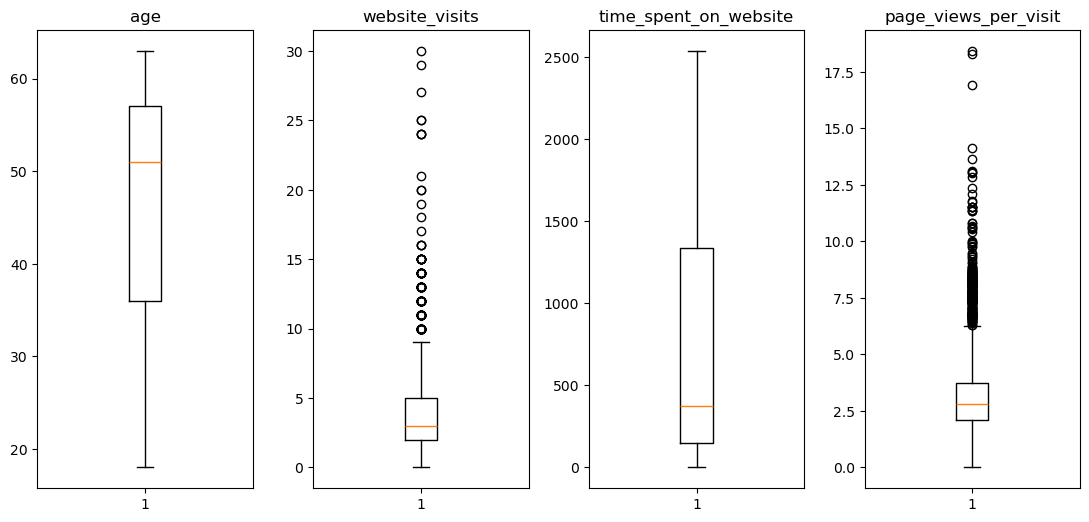

In [34]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(11, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [35]:
X = data.drop(["status", "ID"], axis=1) 
# Status is the dropped since it is a target variable and ID does not provide any information 
# since it is distinct for each record so that can also be dropped
Y = data["status"]

X = pd.get_dummies(X)

# Splitting the data in 80:20 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3689, 25)
Shape of test set :  (923, 25)
Percentage of classes in training set:
status
0    0.701545
1    0.298455
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0    0.700975
1    0.299025
Name: proportion, dtype: float64


In [36]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Observations

* Outliers are present in website visits and pages per visit but this is to be expected. Some leads might visit the website more number of times and view more pages. I don't think we need to peform any any type of outlier treatment and can proceed with seperating out the data into training and test sets.
* The independent variables have been saved in a new dataframe X, all the categorical variables have been converted.
* The set is divided into a 80:20 ratio of training and test data sets.
* First we will build a standard Decision Tree and then use grid search to get a tuned Decision Tree.
* We will compare the performance using our metric score function. We are looking to tune for recall since we don't want to misclassify a potential lead as not a lead. 

## Building a Decision Tree model

In [37]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train1 = d_tree.predict(x_train)

# Evaluate the performance
accuracy_train1 = accuracy_score(y_train, y_pred_train1)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train1:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_train1))

Training Accuracy: 0.9995

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



In [38]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(x_test)  # Make predictions on the test data

# Evaluate the performance
accuracy_test1 = accuracy_score(y_test, y_pred_test1)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test1:.4f}")

# Optionally, print the classification report for detailed performance
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test1))

Test Accuracy: 0.8061

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       647
           1       0.67      0.71      0.69       276

    accuracy                           0.81       923
   macro avg       0.77      0.78      0.77       923
weighted avg       0.81      0.81      0.81       923



## Model Performance evaluation and improvement

In [39]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 15), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 30]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

In [40]:
# Checking performance on the training data using the best model
y_pred_train2 = d_tree_tuned.predict(x_train)

# Evaluate the performance
accuracy_train2 = accuracy_score(y_train, y_pred_train2)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train2:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_train2))

Training Accuracy: 0.7929

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.95      0.75      0.83      2588
           1       0.60      0.90      0.72      1101

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.78      3689
weighted avg       0.84      0.79      0.80      3689



In [41]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(x_test)  # Make predictions on the test data

# Evaluate the performance
accuracy_test2 = accuracy_score(y_test, y_pred_test2)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test2:.4f}")

# Print the classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test2))

Test Accuracy: 0.7725

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       647
           1       0.58      0.89      0.70       276

    accuracy                           0.77       923
   macro avg       0.76      0.81      0.76       923
weighted avg       0.83      0.77      0.78       923



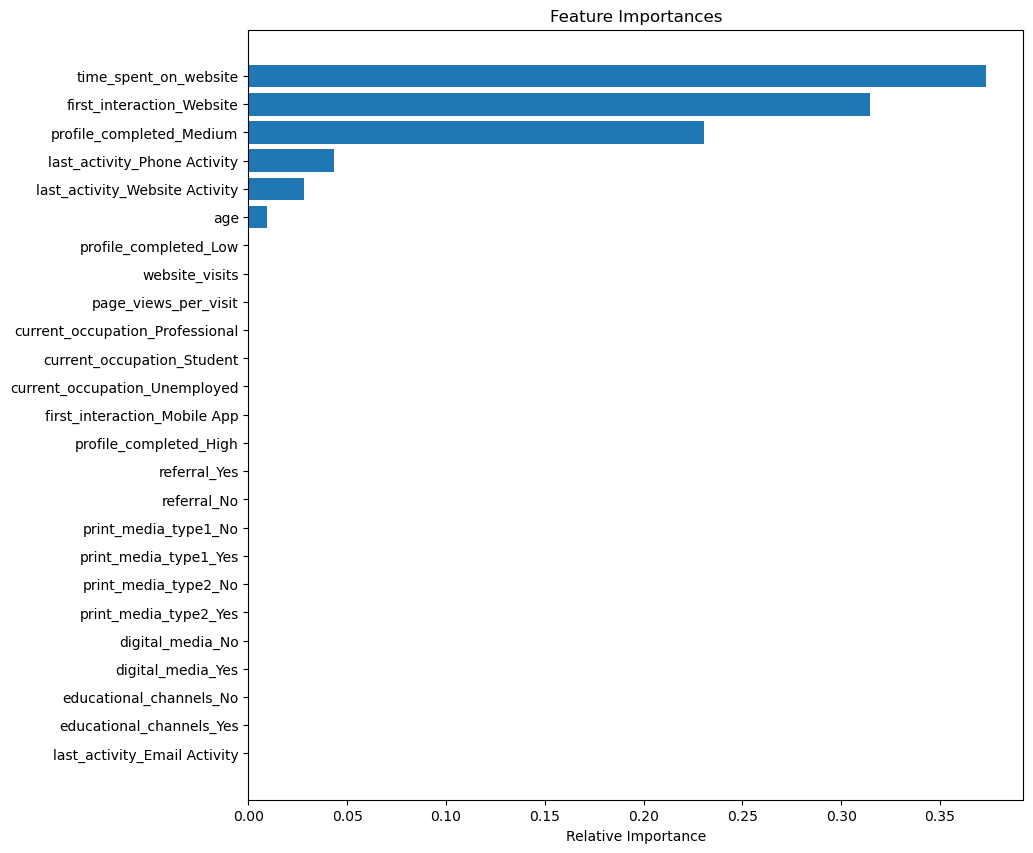

In [42]:
# Plotting the feature importance
features = list(X.columns)

importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Observations

* We build two models, one basic Decision tree and another tuned Decision tree. There is a decrease in the overall accuracy and even tho the recall for 1 increases from 0.71 to 0.89, the recall for 0 deacreases from 0.85 to 0.72 on the test data set. The drop cannot be justified so we should go with the initial model without the tuned parameters.
* By plotting the important features used for classification we can see that the most important features are the time spent on the website, if the first interaction was through the website and the profile should be at least 50% complete

## Building a Random Forest model

In [43]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [44]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train)  # Use the trained Random Forest model to predict on the training data

# Evaluate the performance
accuracy_train3 = accuracy_score(y_train, y_pred_train3)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train3:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_train3))

Training Accuracy: 0.9995

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



In [45]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(x_test)  # Use the trained Random Forest model to predict on the test data

# Evaluate the performance
accuracy_test3 = accuracy_score(y_test, y_pred_test3)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test3:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test3))

Test Accuracy: 0.8559

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       647
           1       0.77      0.73      0.75       276

    accuracy                           0.86       923
   macro avg       0.83      0.82      0.83       923
weighted avg       0.85      0.86      0.85       923



## Model Performance evaluation and improvement

In [46]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

In [47]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(x_train)  # Use the tuned Random Forest model to predict on the training data

# Evaluate the performance
accuracy_train4 = accuracy_score(y_train, y_pred_train4)  # Calculate accuracy
print(f"Training Accuracy: {accuracy_train4:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_train4))

Training Accuracy: 0.8542

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2588
           1       0.71      0.86      0.78      1101

    accuracy                           0.85      3689
   macro avg       0.82      0.86      0.83      3689
weighted avg       0.87      0.85      0.86      3689



In [48]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(x_test)  # Use the tuned Random Forest model to predict on the test data

# Evaluate the performance
accuracy_test4 = accuracy_score(y_test, y_pred_test4)  # Calculate accuracy
print(f"Test Accuracy: {accuracy_test4:.4f}")

# Optionally, you can get a more detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test4))

Test Accuracy: 0.8429

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       647
           1       0.70      0.84      0.76       276

    accuracy                           0.84       923
   macro avg       0.81      0.84      0.82       923
weighted avg       0.86      0.84      0.85       923



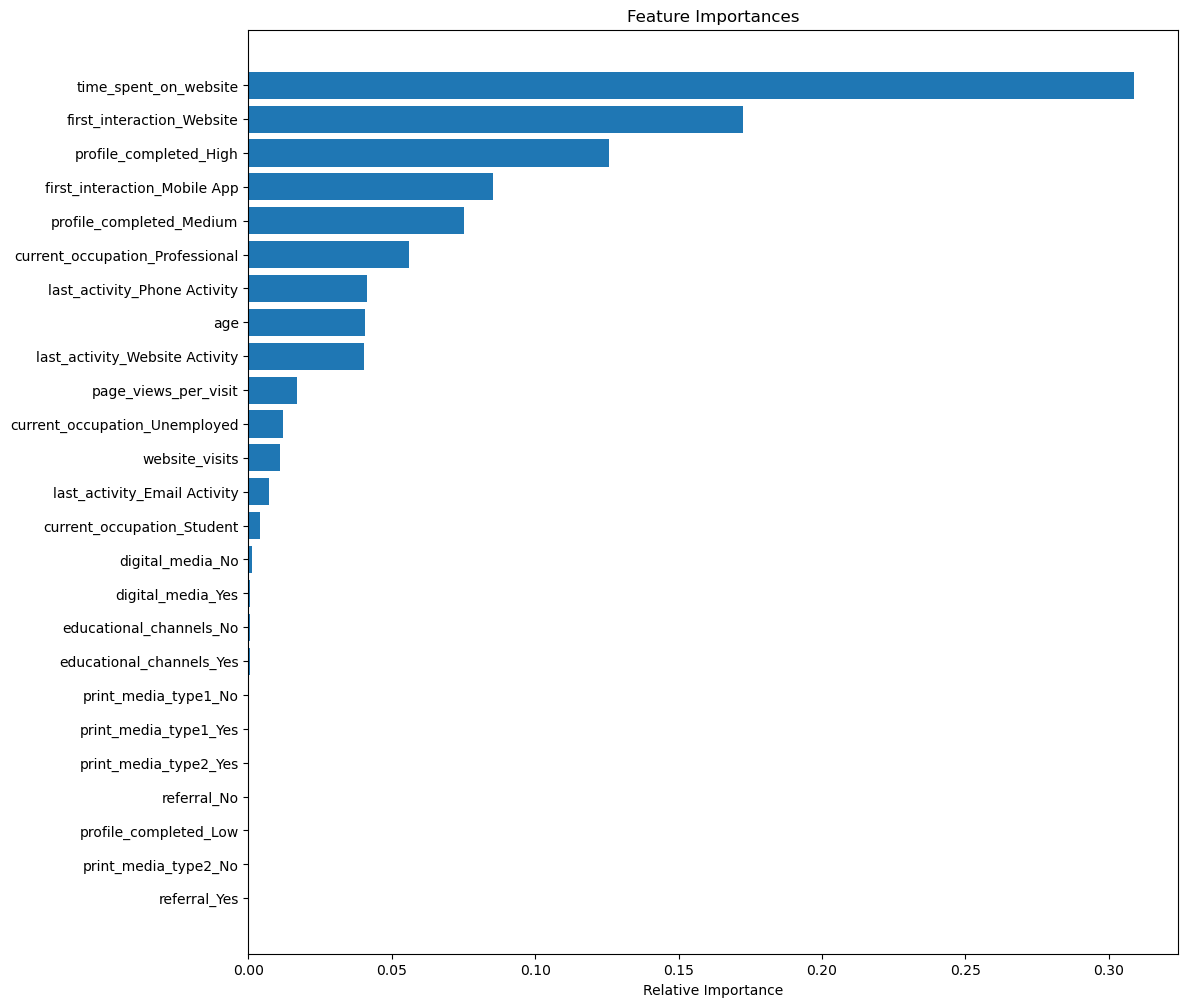

In [49]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Observations

* We build two models, one basic random forest and another random forrest with tuned parameters. The recall for 0 decreases from 0.91 to 0.84 but the recall for 1 increases from 0.73 to 0.84 on the test data. This is an acceptable trade off and we can say that the tuned random forest model is better than the untuned one.
* By plotting the important features used for classification we can see that the most important features are the time spent on the website, if the first interaction was through the website and the profile should be at least 75% complete

## Actionable Insights and Recommendations

1. Focus marketing efforts and personalized communications on the older age group, especially professionals. Tailor content and offers that cater to their interests and needs. For example, highlight the professional benefits of using the product or service.
2. Invest in strategies to boost overall traffic to the website, such as improving SEO, running targeted ads, or engaging in partnerships to drive more visitors.
3. Improve website content to increase user engagement. Introduce interactive elements such as videos, quizzes, or tools to encourage longer visits. Also, consider better navigation and personalized recommendations to enhance user experience.
4. Enhance the website’s internal linking and call-to-action buttons. Use content recommendation systems or personalize the page experience to encourage visitors to explore more pages during each visit.
5. Develop targeted campaigns that speak directly to professionals. Consider offering time-saving features, productivity tools, or career-focused benefits that appeal to this group.
6. Implement strategies to encourage users to complete their profiles. Offer incentives for completing their profiles. Additionally, make the process easier and more intuitive.
7. Prioritize website-first engagement strategies, such as email campaigns that direct prospects to the website or offering exclusive website-based content. Ensure the website offers an optimized user experience to capture potential leads early.
8. Strengthen the referral program and encourage existing customers or leads to refer others. You could provide incentives or rewards for successful referrals. Additionally, measure the effectiveness of each referral channel and adjust strategies accordingly.
9. Optimize email campaigns by segmenting leads based on behavior, such as engagement with the website or profile completeness. Consider personalized email follow-ups, promotions, or content recommendations based on lead status.
10. Invest more in educational and digital media channels. Consider partnerships with educational institutions or digital platforms to attract more leads from these high-performing channels.
11. Focus on these features when designing campaigns and nurturing leads. For instance, time on site could be used as a trigger to send follow-up emails or offers. Leads who spend significant time on the site or who have a profile completion of 50% or more should be prioritized as high-potential leads.
12. Implement the tuned random forest model for lead classification and prediction. Use it to help prioritize leads who are more likely to convert and ensure that marketing and sales efforts are focused on these high-potential leads. Keep monitoring the model’s performance and adjust as necessary.
13. No need for outlier treatment, but monitor high-frequency visitors as they may represent a small group of highly engaged users. Tailor follow-up actions specifically for them, such as offering premium features or personalized content to convert them into paying customers.